<a id="ref1"></a>
<h2>What is Deep Learning?</h2>


Brief Theory: Deep learning (also known as deep structured learning, hierarchical learning or deep machine learning) is a branch of machine learning based on a set of algorithms that attempt to model high-level abstractions in data by using multiple processing layers, with complex structures or otherwise, composed of multiple non-linear transformations.

In Practice, defining the term "Deep": in this context, deep means that we are studying a Neural Network which has several hidden layers (more than one), no matter what type (convolutional, pooling, normalization, fully-connected etc). The most interesting part is that some papers noticed that Deep Neural Networks with the right architectures/hyper-parameters achieve better results than shallow Neural Networks with the same computational power (e.g. number of neurons or connections).

In Practice, defining "Learning": In the context of supervised learning, digits recognition in our case, the learning part consists of a target/feature which is to be predicted using a given set of observations with the already known final prediction (label). In our case, the target will be the digit (0, 1, 2, 3, 4, 5, 6, 7, 8, 9) and the observations are the intensity and relative position of the pixels. After some training, it is possible to generate a "function" that map inputs (digit image) to desired outputs(type of digit). The only problem is how well this map operation occurs. While trying to generate this "function", the training process continues until the model achieves a desired level of accuracy on the training data.

In [1]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

Instructions for updating:
non-resource variables are not supported in the long term


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

 We first classify MNIST using a simple Multi-layer perceptron and then, in the second part, we use deep learning to improve the accuracy of our results.
<a id="ref3"></a>
<h2>1st part: Classify MNIST using a simple model.</h2>

We are going to create a simple Multi-layer perceptron, a simple type of Neural Network, to perform classification tasks on the MNIST digits dataset. If you are not familiar with the MNIST dataset, please consider to read more about it: click here

What is MNIST?
According to LeCun's website, the MNIST is a: "database of handwritten digits that has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image".

<h3>Import the MNIST dataset using TensorFlow built-in feature</h3>


It's very important to notice that MNIST is a high optimized data-set and it does not contain images. You will need to build your own code if you want to see the real digits. Another important side note is the effort that the authors invested on this data-set with normalization and centering operations.

In [2]:
# Simple NN to classify handwritten digits from MNIST dataset

In [16]:
from matplotlib import pyplot 
import numpy as np
# keras imports for the dataset and building our neural network
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<h3>Creating placeholders<h3>

In [17]:
# define the input and output 
# here None means that a dimension can be of any length,
# which is what we want, since the number of observations
# we have can vary;
# note that the shape argument to placeholder is optional, 
# but it allows TensorFlow to automatically catch bugs stemming 
# from inconsistent tensor shapes

# x is placeholder for the 28X28 image data
x = tf.placeholder(tf.float32,shape=[None,784])
#y_ is called "y bar" and is a 10 element vector,containing the predicted
# probability of each digits(0-9) class. such as [0.14,0.8,0,0,0,0,0,0.06]
y_ = tf.placeholder(tf.float32,[None,10])

<h3>Assigning bias and weights to null tensors</h3>

In [18]:
# initialize both W and b as tensors full of zeros. 
# these are parameters that the model is later going to learn,
# Notice that W has a shape of [784, 10] because we want to multiply 
# the 784-dimensional image vectors by it to produce 10-dimensional 
# vectors of evidence for the difference classes. b has a shape of [10] 
# so we can add it to the output.

# Define weights and balance

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [24]:
#Define our model
# to define the softmax classifier and cross entropy cost
# we can do the following

# matrix multiplication using the .matmul command
# and add the softmax output
y = tf.nn.softmax(tf.matmul(x,W) + b)

Softmax is an activation function that is normally used in classification problems. It generate the probabilities for the output. For example, our model will not be 100% sure that one digit is the number nine, instead, the answer will be a distribution of probabilities where, if the model is right, the nine number will have a larger probability than the other other digits.

Logistic function output is used for the classification between two target classes 0/1. Softmax function is generalized type of logistic function. That is, Softmax can output a multiclass categorical probability distribution.

In [37]:
# cost function: cross entropy, the reduce mean is simply the 
 #average of the
# cost function across all observation
# Loss is cross entropy
cross_entropy = tf.reduce_mean(
             tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [38]:
# each training step in gradient decent we want to minimize cross entropy
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [39]:
# initialize the global variable

init = tf.global_variables_initializer()

In [40]:
# Create an interactive session that can span multiple code blocks.Don't 
# forget to explicity close that session with sess.close()
sess = tf.Session()

In [42]:
#perform the initialization which is only the initialization of all global 
# variables
sess.run(init)

In [43]:
#Perform 1000 training steps
for i in range(1000):
    # get 100 random data points from the data batch_xs= images,
    #batch_ys = digits(0-9) class
    batch_xs, batch_ys = mnist.train.next_batch(100) 
    sess.run(train_step, feed_dict={x: batch_xs,y_: batch_ys}) # do the optimization with class
    

In [44]:
# Evaluate how well the model did. Do this by comparing the digit with the
# highest probability in actual(y) and predicted(y_)
# here we're return the predicted class of each observation using argmax
# and see if the ouput (prediction) is equal to the target variable (y)
# since equal is a boolean type tensor, we cast it to a float type to compute
# the actual accuracy
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [46]:
test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})

test_accuracy

0.9077

Notice that we did not have to worry about computing the gradient to update the model, the nice thing about Tensorflow is that, once we've defined the structure of our model it has the capability to automatically differentiate mathematical expressions. This means we no longer need to compute the gradients ourselves! In this example, our softmax classifier obtained pretty nice result around 90%. But we can certainly do better with more advanced techniques such as convolutional deep learning.

<a id="ref6"></a>
<h2>2nd Part: Deep Learning Applied on MNIST</h2>

In [ ]:
# finish possible remaining session
sess.close()


In [ ]:
# Create input object which reads data from mnist datasets.
# perform one-hot encoding to define the digit
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
#Start interactive session
sess = tf.InteractiveSession()

<h3>Initial Parameters <h3>

In [ ]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

<h>Input and output<h>

<h>Create place holders for inputs and outputs<h>

In [ ]:
x  = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

In [ ]:
#change the mnist input data from list of values to a 28 pixel X 28 pixel 
# X 1 grayscale value cube which the convolution NN can use 
# Converting images of the data set to tensors
x_image = tf.reshape(x,[-1,28,28,1],name='x_image')
x_image

<h3>Convolutional Layer 1</h3>

define helper functions to created weights and baises variables, and convolution, and pooling layer.
we are using RELU as our activation function. These must be initialized to a small positive number and with some noise so you don't end up going to zero when comparing diffs 

In [ ]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

In [ ]:
def bias_variable(shape):
    initial = tf.constant(0.1,shape=shape)
    return tf.Variable(initial)

Convolutional and pooling - we do convolution, and the pooling to control overfitting.

In [ ]:
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

<h4>Apply the max pooling<h4>

In [ ]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],
                    strides=[1,2,2,1],padding='SAME')

<h3>Convolutional Layer 1</h3>
<h4>Weights and Biases of kernels</h4>

<a>Define layers in the NN <a>
1st Convolution layer
32 features for each 5X5 patch of the image

In [ ]:
W_conv1= weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

In [ ]:
#Do convolution on images, add bias and push through RELU activation
h_conv1= tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)

# take result and run through max_pool
h_pool1 = max_pool_2x2(h_conv1)

In [ ]:
# Process the 32 features from convolution lay 1, in 5X5 patch.
# Return 64 featurs weight and biases 
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

In [ ]:
# Do convolution of the output ofhte 1st convolution layer. pool results
h_conv2 = tf.nn.relu(conv2d(h_pool1,W_conv2) + b_conv2)

h_pool2 = max_pool_2x2(h_conv2)

<h3>Fully Connected Layer<h3>

Weights and Biases between layer 2 and 3

In [ ]:
W_fc1 = weight_variable([7*7*64,1024])
b_fc1 = bias_variable([1024])

connect output of pooling layer 2 as input to full connected lay

In [ ]:
h_pool2_flat = tf.reshape(h_pool2,[-1,7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1) + b_fc1)

<h3>Dropout Layer, Optional phase for reducing overfitting<h3>

In [ ]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
h_fc1_drop

<h3>Readout Layer (Softmax Layer)<h3>  
   <h4>Weights and Biases<h4>
<b>In last layer, CNN takes the high-level filtered images and translate them into votes using softmax. Input channels: 1024 (neurons from the 3rd Layer); 10 output features<b>

In [ ]:
W_fc2 = weight_variable([1024,10])
b_fc2 = bias_variable([10])

Define model

In [ ]:
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [ ]:
# loss measurement
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
logits=y_conv,labels=y_))

In [ ]:
# Optimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [ ]:
# Define Predictions
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))

In [ ]:
#Define Accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
#Define number of steps and how often we display progress
num_steps =2000
display_every =100

In [ ]:
#Train the model
import time

In [ ]:

start_time =time.time()
end_time = time.time()

In [ ]:
for i in range(num_steps):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    
    #Periodic status display
    if i%display_every==0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
        end_time = time.time()
        print("step {0}, elapsed time {1:.2f} seconds , training accuracy {2:.2f}%".format(i,end_time-start_time, float(train_accuracy)*100))

<a id="ref9"></a>
<h2>Evaluate the model</h2>

In [ ]:
# Display summary
     #  Time to train
end_time = time.time()
print("Total training time for {0} batches:{1:.2f} seconds".format(i+1,end_time-start_time))

# Accuracy on test data
print("Total accuracy {0:.3f}%".format(accuracy.eval(feed_dict={
    x:mnist.test.images,y_:mnist.test.labels,keep_prob:1.0})*100.0))
              
sess.close()

In [ ]:
sess.close() #finish the session

#  Digital Recognition Using CNN

In [76]:
import numpy as np                   # package for computing
from sklearn.model_selection import train_test_split  # split dataset
import keras                # import keras with tensorflow as backend
from keras.datasets import mnist         # import mnist dataset from keras 
from keras.models import Model, Sequential  # sequential and functional api keras 
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, Input   # dense and input layer for constructing mlp
from keras.models import Sequential
import matplotlib.pyplot as plt     # matplotlib library for plotting

# display plots inline (in notebook itself)
%matplotlib inline 

In [97]:
# Load mnist data
# the data, split between train and validation set
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [98]:
#orginally shape (60000, 28, 28) for train and (10000, 28, 28) for test
#but as we will be using fully connected layers we will flatten
#the images into 1d array of 784 values instead of (28 x 28) 2d array
train_x = train_x.reshape(train_x.shape[0],28,28,1)
test_x = test_x.reshape(test_x.shape[0],28,28,1)

In [99]:
# As image is grayscale it has values from [0-255] which we will visualize below
# convert dtype to float32 and scale the data from [0-255] to [0-1]
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [100]:
# Normalize your training and test image datasets:
train_x /=255
test_x /=255

In [101]:
print('Training samples and shape:', train_x.shape[0], train_x.shape)
print('Test samples and shape:', test_x.shape[0], test_x.shape)

Training samples and shape: 60000 (60000, 28, 28, 1)
Test samples and shape: 10000 (10000, 28, 28, 1)


In [102]:
# we will split val into --> 20% val set and 80% test set 
# stratify ensures the distribution of classes is same in both the sets

val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.8, stratify=test_y)

print ('Validation samples and shape', val_x.shape[0], val_x.shape)
print ('Test samples and shape', test_x.shape[0], test_x.shape)

Validation samples and shape 2000 (2000, 28, 28, 1)
Test samples and shape 8000 (8000, 28, 28, 1)


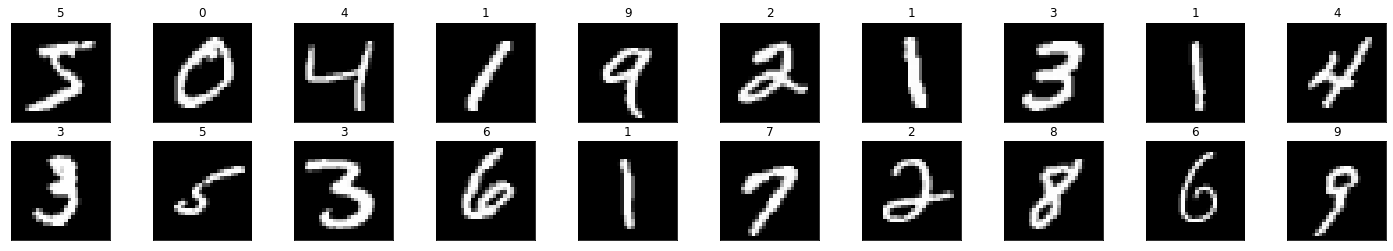

In [103]:
# Visualization data
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for i in range(20):
    ax = fig.add_subplot(2,20/2 , i +1,xticks=[],yticks=[])
    ax.imshow(train_x[i].reshape(28,28),cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(train_y[i]))

In [93]:
# [0-9] unique labels
num_classes = 10
epochs = 10
batch_size = 32

In [94]:
# convert class vectors to binary class matrices
#train_y = keras.utils.to_categorical(train_y, num_classes)
#val_y = keras.utils.to_categorical(val_y, num_classes)
#test_y = keras.utils.to_categorical(test_y, num_classes)
#print ('Training labels shape:', train_y.shape)

Training labels shape: (60000, 10)


In [104]:
# Build model
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [105]:
# Compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy'
             ,metrics=['accuracy'])

# Fit
model.fit(x=train_x, y= train_y,epochs=10)




Epoch 1/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.2136 - accuracy: 0.9367
Epoch 2/10
60000/60000 [==============================] - 19s 323us/step - loss: 0.0844 - accuracy: 0.9742
Epoch 3/10
60000/60000 [==============================] - 20s 330us/step - loss: 0.0588 - accuracy: 0.9821
Epoch 4/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0453 - accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0341 - accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0285 - accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0238 - accuracy: 0.9916
Epoch 8/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.0214 - accuracy: 0.9925
Epoch 9/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0188 - accuracy: 0.9934
Epoch 10/10
60000/60000 [=========

In [106]:
# Evaluate the model
model.evaluate(test_x, test_y)

8000/8000 [==============================] - 1s 83us/step


[0.06886547472439088, 0.984624981880188]

In [107]:
# We achieved 98.5% accuracy with such basic model.
# Many image classification cases(autonomous car),we can not even tolerate
# 0.1% error since, as analogy it will cause 1 accident in 1000 cases.
# However our model, I would say the result is still pretty good,
# We can also make individual predictions with the following code:

NameError: name 'img_rows' is not defined

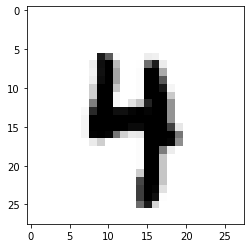

In [113]:
image_index = 4444
plt.imshow(test_x[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(test_x[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

Our model was able to classify it as 4.